Author: Michael Antys

# 3. Reading and writing files

### Goals

- reading the atom coordinates from a PDB file
- output value tables to a text file
- learning to do calculations with *numpy arrays*
- first plotting with *matplitlib*

### Introduction

#### ATOM data in PDB files

The PDB file format contains information about atom species and positions. This information is found in lines starting with ``ATOM``. Each of these lines has the same amount of characters and has the following format:

| Characters | Type                                  | Data type        |       
|------------|---------------------------------------|------------------|
| 1 - 6      | Record name «ATOM»                    | String           |
| 7-11       | Serial atom number                    | Integer          |
| 13-16      | Atom name                             | String           |
| 17         | Alternate location                    | String           |
| 18-20      | Residue name                          | String           |
| 22         | Chain identifier                      | String           |
| 23-26      | Residue sequence nb.                  | Integer          |
| 27         | Code for residues insertion           | String           |
| 31-38      | X coordinate in Å                     | Float            |
| 39-46      | Y coordinate in Å                     | Float            |
| 47-54      | Z coordinate in Å                     | Float            |
| 55-60      | Occupancy                             | Float            |
| 61-66      | Temperature factor                    | Float            |
| 77-78      | Element symbol                        | String           |
| 79-80      | Charge                                | String           |

Further reading: http://www.wwpdb.org/documentation/file-format-content/format33/v3.3.html

**Note:** With PDB files, splitting the lines in their individual columns using the function ``line.split()`` is dangerous: use character positions instead!

### *TASK 1*

In this folder you will find the PDB file for Proaerolysin (``1PRE.pdb``). Open the file, and print all the lines containing a cysteine (residue name "CYS"). 

**Note:** Remember that in *Python* one starts counting from 0, not 1!

In [ ]:
file_handle=open('1PRE.pdb','r')
list_of_strings = file_handle.readlines()
for string in list_of_strings:
    if string[17:20] == "CYS":
        print(string)
file_handle.close()

### *TASK 2*

Parse ``1PRE.pdb`` and write the $x$, $y$ and $z$ coordinates of all the cysteines to the output file ``atoms_cys.txt``. Use [*f-strings*](https://www.blog.pythonlibrary.org/2018/03/13/python-3-an-intro-to-f-strings/) to generate one string for each line ending with a newline character ``\n``.

**Advanced:** Make sure that columns are aligned.

In [ ]:
file_handle=open('1PRE.pdb','r')
list_of_strings = file_handle.readlines()
with open('atoms_cys_antys.txt', 'w') as file:
    for string in list_of_strings:
        if string[17:20] == "CYS":
            file.writelines(f"({string[30:38]},{string[38:46]},{string[46:54]}) \n")
file_handle.close()

### *TASK 3*

Define a function ``read_pdb(filename)`` that expects as input parameter a PDB filename and that returns four *numpy arrays* containing
- the $x$ coordinates
- the $y$ coordinates
- the $z$ coordinates
- the atomic numbers (proton numbers)

**Advanced:** Save the function in another file called ``pdb_``*yourname*``.py``, import and call it.

In [ ]:
import numpy

import pdb_antys

read_pdb('1PRE.pdb')

### *TASK 4*

Use the *matplotlib* function [*matplotlib.pyplot.scatter* ](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to visualise the $x$ and $y$ coordinates of Proaerolysin.

**Advanced:** Plot each element in a different color.

In [1]:
# Magic import of the matplotlib package for activating plotting in the notebook
import matplotlib
%matplotlib inline

import numpy

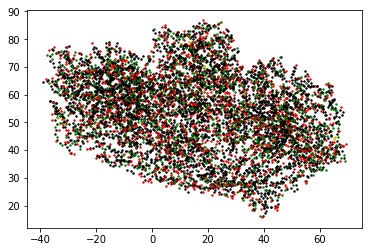

In [9]:
filename='1PRE.pdb'
with open(filename,'r') as file_handle:
    list_of_strings = file_handle.readlines()
    for string in list_of_strings:
        if string.startswith("ATOM"):
            x=float(string[30:38])
            y=float(string[38:46])
            z=float(string[46:54])
            atom=string[77]
            if atom=="H":      
                atom='b'
            elif atom=="C":
                atom='k'
            elif atom=="N":        
                atom='g'
            elif atom=="O":
                atom='r'
            elif atom=="S":
                atom='y'
            else:
                atom=None
            array=(x, y, z, atom)
            matplotlib.pyplot.scatter(array[0], array[1], s=2, c=array[3])

### *EXTRA TASK*

The radius of gyration of a molecule of $N$ atoms is defined as
    
$$R_g = \sqrt{\frac{\sum_i^N m_i r_i^2}{\sum_i^N m_i}}$$

where $m_i$ is mass of atom $i$ and $r_i$ is the distance of atom $i$ from the molecule's center of mass

$$\vec{r_0} = \frac{\sum_i^N m_i \vec{r_i}}{\sum_i^N m_i}$$

Estimate the size of Proaerolysin by calculating the radius of gyration on the basis of only its carbon atoms.

**Advanced:** Consider atoms of all elements for this calculation.